# Gold Price Prediction


In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
df = pd.read_excel("C:/Users/Christopher Aryo/Desktop/ProjekG24/scrapedata/scrape103.xlsx")

In [3]:
df.head()

,tanggal,goldprice
0,10 Maret 2014,545000
1,12 Maret 2014,547000
2,14 Maret 2014,552000
3,17 Maret 2014,556000
4,19 Maret 2014,546000


In [4]:
df = df[['goldprice']]

Text(0, 0.5, 'Antam Prices')

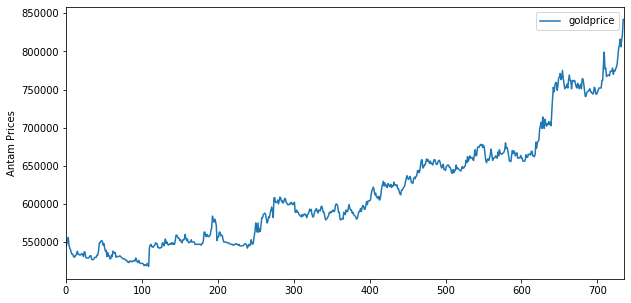

In [5]:
dfrev.plot(figsize=(10,5))
plt.ylabel("Antam Prices")

In [6]:
df['s_3'] = df['goldprice'].shift(1).rolling(window=3).mean()
df['s_9'] = df['goldprice'].shift(1).rolling(window=9).mean()
df = df.dropna()
X=df[['s_3','s_9']]
X.head()

,s_3,s_9
9,536666.666667,544222.222222
10,534666.666667,543000.000000
11,533000.000000,541222.222222
12,531666.666667,538777.777778
13,531000.000000,536111.111111


In [7]:
y = df['goldprice']
y.head()

9     534000
10    531000
11    530000
12    532000
13    532000
Name: goldprice, dtype: int64

In [8]:
t = .8
t = int(t*len(df))

#train dataset
X_train = X[:t]
y_train= y[:t]

#test dataset
X_test = X[t:]
y_test = y[t:]

In [9]:
lm = LinearRegression()
linear = lm.fit(X_train,y_train)
print("Antam Price = ",round(linear.coef_[0],2),\
     "* 3 Days Moving Average ",round(linear.coef_[1],2),\
     "* 9 Days Moving Average + ", round(linear.intercept_,2))

Antam Price =  1.09 * 3 Days Moving Average  -0.09 * 9 Days Moving Average +  1604.84


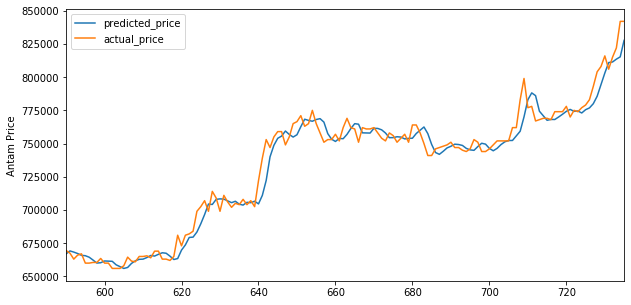

In [14]:
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index, columns = ['Price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['predicted_price','actual_price'])
plt.ylabel("Antam Price")
plt.show()

In [11]:
r2_score = linear.score(X[t:],y[t:])*100
float("{0:.2f}".format(r2_score))

96.65